# Imports

In [25]:
from datetime import datetime

import astropy.units as u
import numpy as np

from astropy.time import Time
from astropy.io import fits
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

from sunpy.net import Fido, attrs as a

from radiospectra import net #let Fido know about the radio clients
from radiospectra.spectrogram2 import Spectrogram

# What can be searched for?

In [2]:
a.Instrument   #try .waves .swave .rstn .

Attribute Name,Client,Full Name,Description
aia,VSO,AIA,Atmospheric Imaging Assembly
bbi,VSO,BBI,None
bcs,VSO,BCS,Bragg Crystal Spectrometer
be_continuum,VSO,BE-Continuum,INAF-OACT Barra Equatoriale Continuum Instrument
be_halpha,VSO,BE-Halpha,INAF-OACT Barra Equatoriale Hα Instrument
bic_hifi,VSO,BIC-HIFI,None
bigbear,VSO,Big Bear,"Big Bear Solar Observatory, California TON and GONG+ sites"
caii,VSO,CAII,Kanzelhöhe Ca II k Instrument
cds,VSO,CDS,Coronal Diagnostic Spectrometer
celias,VSO,CELIAS,"Charge, Element, and Isotope Analysis System"


# Let look for a lot of radio data from 2017-09-02 15:00 - 18:00

In [3]:
query = Fido.search(a.Time('2017-09-02T15:00', '2017-09-02T18:00'), 
                    a.Instrument.waves | a.Instrument.rstn | a.Instrument.ecallisto | a.Instrument.swaves)

/Users/shane/.virtualenvs/stellar-sww/lib/python3.7/site-packages/astropy/table/table.py:3197: FutureWarning: elementwise == comparison failed and returning scalar instead; this will raise an error or perform elementwise comparison in the future.
  result = self.as_array() == other


In [4]:
query

<sunpy.net.fido_factory.UnifiedResponse object at 0x121c32898>
Results from 5 Providers:

2 Results from the WAVESClient:
       Start Time               End Time        Instrument Source Provider   Wavelength [2] 
                                                                                  kHz       
----------------------- ----------------------- ---------- ------ -------- -----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA    20.0 .. 1040.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999      WAVES   WIND     NASA 1075.0 .. 13825.0

2 Results from the RSTNClient:
       Start Time               End Time        Provider Instrument Observatory
----------------------- ----------------------- -------- ---------- -----------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN   Learmonth
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     RSTN       RSTN    San Vito

402 Results from the CALLISTOClient:
       Start Time               End Time         Provider Instrument Observatory   ID
----------------------- ----------------------- --------- ---------- ------------ ---
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:00:00.000 2017-09-02 15:14:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:15:00.000 2017-09-02 15:29:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   0
2017-09-02 15:30:00.000 2017-09-02 15:44:59.999 ECALLISTO  ECALLISTO ALASKA-COHOE   1
                    ...                     ...       ...        ...          ... ...
2017-09-02 16:30:00.000 2017-09-02 16:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 16:45:00.000 2017-09-02 16:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:00:00.000 2017-09-02 17:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:15:00.000 2017-09-02 17:29:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:30:00.000 2017-09-02 17:44:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 17:45:00.000 2017-09-02 17:59:59.999 ECALLISTO  ECALLISTO         ZSTS  59
2017-09-02 18:00:00.000 2017-09-02 18:14:59.999 ECALLISTO  ECALLISTO         ZSTS  59
Length = 402 rows

4 Results from the VSOClient:
       Start Time               End Time         Source  Instrument Wavelength [2] Provider Wavetype   Size     Info  
                                                                         MHz                          Mibyte          
----------------------- ----------------------- -------- ---------- -------------- -------- -------- ------- ---------
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES  0.125 .. 16.0      SSC    BROAD 3.51668 HFR ;  ; 
2017-09-02 00:00:00.000 2017-09-03 00:00:00.000 STEREO_A     SWAVES   0.01 .. 0.16      SSC    BROAD 0.53499 LFR ;  ; 

2 Results from the SWAVESClient:
       Start Time               End Time        Instrument Source Spacecraft Provider  Wavelength [2] 
                                                                                            kHz       
----------------------- ----------------------- ---------- ------ ---------- -------- ----------------
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA    10.0 .. 160.0
2017-09-02 00:00:00.000 2017-09-02 23:59:59.999     SWAVES STEREO          a     NASA 125.0 .. 16000.0

# Many results let try WAVES and RST

* First download the the data

In [5]:
rstn_files = Fido.fetch(query['rstn'])
waves_files = Fido.fetch(query['waves'])

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

Files Downloaded:   0%|          | 0/2 [00:00<?, ?file/s]

SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x12176ccc0>
transport: <_SelectorSocketTransport fd=92 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in data_received
    ssldata, appdata = self._sslpipe.feed_ssldata(data)
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 207, in feed_ssldata
    self._sslobj.unwrap()
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/ssl.py", line 767, in unwrap
    return self._sslobj.shutdown()
ssl.SSLError: [SSL: KRB5_S_INIT] application data after close notify (_ssl.c:2580)
SSL error in data received
protocol: <asyncio.sslproto.SSLProtocol object at 0x12176ce10>
transport: <_SelectorSocketTransport fd=93 read=polling write=<idle, bufsize=0>>
Traceback (most recent call last):
  File "/Users/shane/.pyenv/versions/3.7.0/lib/python3.7/asyncio/sslproto.py", line 526, in

* Load into spectrograms

In [6]:
rstn_spec = Spectrogram(sorted(rstn_files))
waves_spec = Spectrogram(sorted(waves_files))

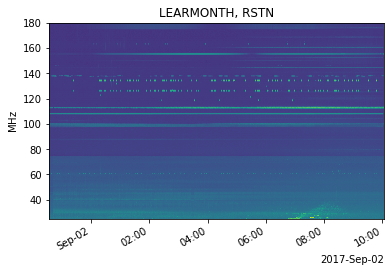

In [7]:
rstn_spec[0].plot()

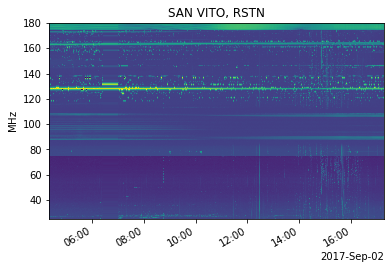

In [8]:
rstn_spec[1].plot()

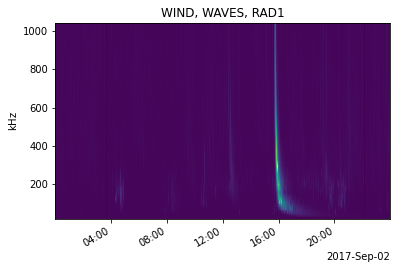

In [9]:
waves_spec[0].plot()

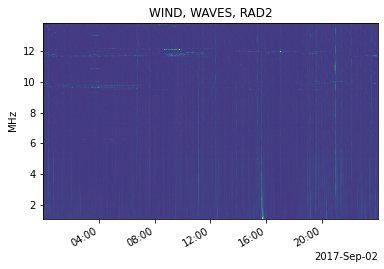

In [10]:
waves_spec[1].plot()

* Waves data looks like it captured burst let make a nice figure

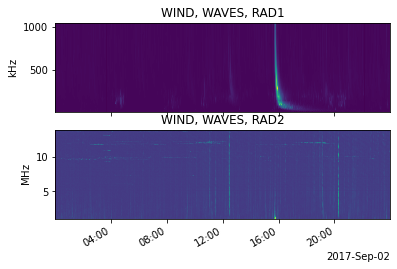

In [11]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

(13.825, 1.075)

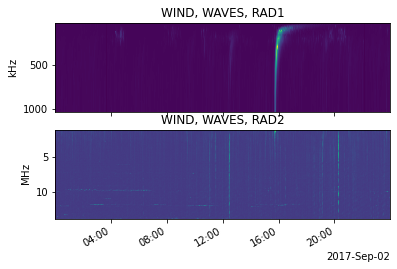

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

#

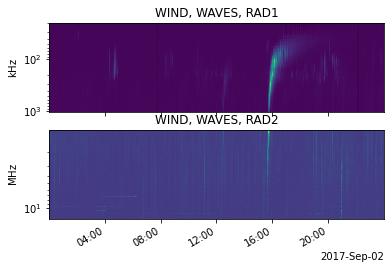

In [13]:
fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

(17411.625, 17411.75)

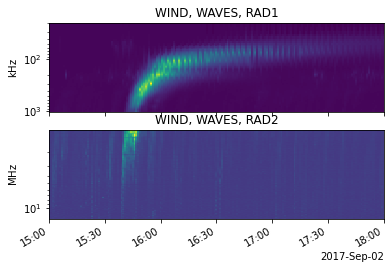

In [14]:
from datetime import datetime

fig, axes = plt.subplots(2, 1, sharex=True)

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

# by default y-axis low to hight flip so moving away fro sun with time
axes[0].set_ylim(reversed(axes[0].get_ylim()))
axes[1].set_ylim(reversed(axes[1].get_ylim()))

# log y-axis
axes[0].set_yscale('log')
axes[1].set_yscale('log')

axes[1].set_xlim(datetime(2017, 9, 2, 15), datetime(2017, 9, 2, 18))

# Find some callisto data?
* http://soleil.i4ds.ch/solarradio/callistoQuicklooks/?date=20170902
* Glasgow data looks good

In [15]:
cids = (query['CALLISTO']['Observatory'] == 'GLASGOW') #& (query['CALLISTO']['ID'] == 1)
callisto_files = Fido.fetch(query['CALLISTO'][cids], overwrite=True, max_conn=1)
callisto_files = Fido.fetch(callisto_files)

Files Downloaded:   0%|          | 0/12 [00:00<?, ?file/s]

GLASGOW_20170902_150000_59.fit.gz:   0%|          | 0.00/236k [00:00<?, ?B/s]

GLASGOW_20170902_151500_59.fit.gz:   0%|          | 0.00/238k [00:00<?, ?B/s]

GLASGOW_20170902_153000_59.fit.gz:   0%|          | 0.00/283k [00:00<?, ?B/s]

GLASGOW_20170902_154500_59.fit.gz:   0%|          | 0.00/249k [00:00<?, ?B/s]

GLASGOW_20170902_160000_59.fit.gz:   0%|          | 0.00/247k [00:00<?, ?B/s]

GLASGOW_20170902_161500_59.fit.gz:   0%|          | 0.00/249k [00:00<?, ?B/s]

GLASGOW_20170902_163000_59.fit.gz:   0%|          | 0.00/245k [00:00<?, ?B/s]

GLASGOW_20170902_164500_59.fit.gz:   0%|          | 0.00/248k [00:00<?, ?B/s]

GLASGOW_20170902_170000_59.fit.gz:   0%|          | 0.00/245k [00:00<?, ?B/s]

GLASGOW_20170902_171500_59.fit.gz:   0%|          | 0.00/243k [00:00<?, ?B/s]

GLASGOW_20170902_173000_59.fit.gz:   0%|          | 0.00/240k [00:00<?, ?B/s]

GLASGOW_20170902_174500_59.fit.gz:   0%|          | 0.00/247k [00:00<?, ?B/s]

Files Downloaded: 0file [00:00, ?file/s]

In [16]:
callisto_specs = Spectrogram(callisto_files, silence_errors=True)

callisto_specs

[<CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T16:00:00.469 to 2017-09-02T16:15:00.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T17:30:00.468 to 2017-09-02T17:45:00.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T15:45:00.477 to 2017-09-02T16:00:00.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T17:45:00.474 to 2017-09-02T17:59:57.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T16:15:00.531 to 2017-09-02T16:30:00.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T15:15:00.586 to 2017-09-02T15:30:00.000>,
 <CALISTOSpectrogram GLASGOW, E-CALLISTO, E-CALLISTO 45000.0 kHz - 80813.00354003906 kHz, 2017-09-02T16:45:00.624 to 2017-09-02T17:00:00.000>,

[None, None, None, None, None, None, None, None, None, None, None, None]

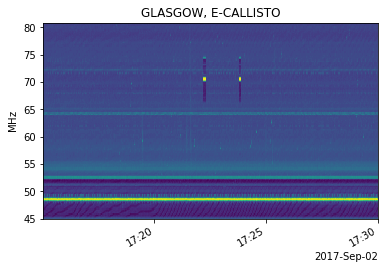

In [17]:
fig, axes = plt.subplots()
[sp.plot(axes=axes) for sp in callisto_specs]

# Load data not supported by Spectrogram

In [18]:
data = np.zeros((200, 200))
data[50:150, 50:150] = 1
times = Time('2017-09-02 15:00') + np.arange(200) * u.s
freqs = np.linspace(10, 20, 200) * u.GHz

# expects at least the following meta data
meta = {
    'observatory': 'some place',
    'instrument': 'an instrument',
    'detector': 'the detector',
    'freqs': freqs,
    'times': times,
    'wavelength': a.Wavelength(freqs[0], freqs[-1]),
    'start_time': times[0],
    'end_time': times[-1]
}
super_spec = Spectrogram(data, meta )

In [19]:
super_spec

<GenericSpectrogram SOME PLACE, AN INSTRUMENT, THE DETECTOR 10000000.0 kHz - 20000000.0 kHz, 2017-09-02T15:00:00.000 to 2017-09-02T15:03:19.000>

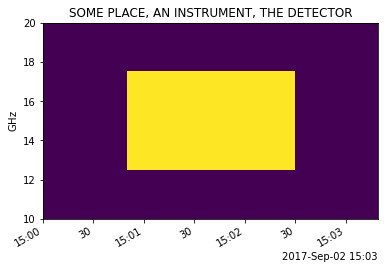

In [20]:
super_spec.plot()

# Use the Orfee web site to find and dowload data
* 
* Upload an exampple fits file to google drive 

In [21]:
orfee = fits.open('https://drive.google.com/uc?export=download&id=1vcRra0MAUzEbjphwXK8hBFiP8QM7wNOV')
orfee

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x1209607b8>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x120f09cc0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x120f34f60>]

In [22]:
orfee_i = np.hstack([orfee[2].data[f'STOKESI_B{i}'] for i in range(1, 6)]).T
orfee_v = np.hstack([orfee[2].data[f'STOKESV_B{i}'] for i in range(1, 6)]).T

orfee_time_str = orfee[0].header['DATE-OBS'] #+ 'T' + orfee[0].header['TIME-OBS']
# orfee_time_str = orfee_time_str[:-4] +'.' + orfee_time_str[-3:]

orfee_times = Time(orfee_time_str) + (orfee[2].data['TIME_B1']/1000)*u.s # times are not the same for all sub spectra!
orfee_freqs = np.hstack([orfee[1].data[f'FREQ_B{i}'] for i in range(1, 6)]) *u.MHz

In [23]:
orfee_meta = {
    'observatory': orfee[0].header['ORIGIN'],
    'instrument': orfee[0].header['INSTRUME'],
    'detector': orfee[0].header['INSTRUME'],
    'freqs': orfee_freqs.reshape(-1),
    'times': orfee_times,
    'wavelength': a.Wavelength(orfee_freqs[0,0], orfee_freqs[0,-1]),
    'start_time': orfee_times[0],
    'end_time': orfee_times[-1]
}
orfee_spec_i = Spectrogram(orfee_i, orfee_meta)
orfee_spec_v = Spectrogram(orfee_v, orfee_meta)
orfee_spec_i

<GenericSpectrogram OBSERVATOIRE DE NANCAY FRANCE, ORFEES, ORFEES 144130.0048828125 kHz - 1004700.0122070312 kHz, 2017-09-02T15:00:05.392 to 2017-09-02T16:51:00.392>

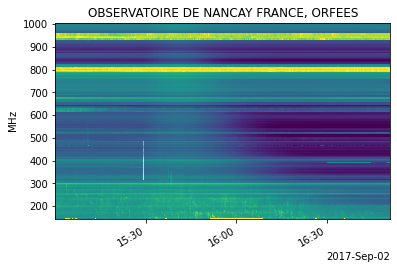

In [26]:
vmm = np.percentile(orfee_spec_i.data, [1,99])
orfee_spec_i.plot(norm=LogNorm(vmin=vmm[0], vmax=vmm[1]))


(1004.7000122070312, 144.1300048828125)

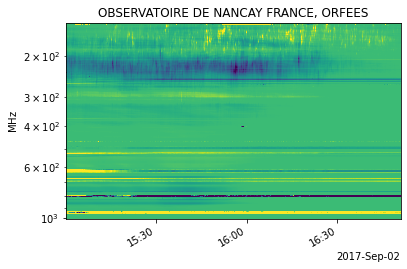

In [27]:
vmm = np.percentile(orfee_spec_v.data, [1,99])
orfee_spec_v.plot(vmin=vmm[0], vmax=vmm[1])
plt.semilogy()
plt.ylim(plt.ylim()[::-1])

# Final combined plot 1000 MHz to 1 kHz

(17411.625, 17411.75)

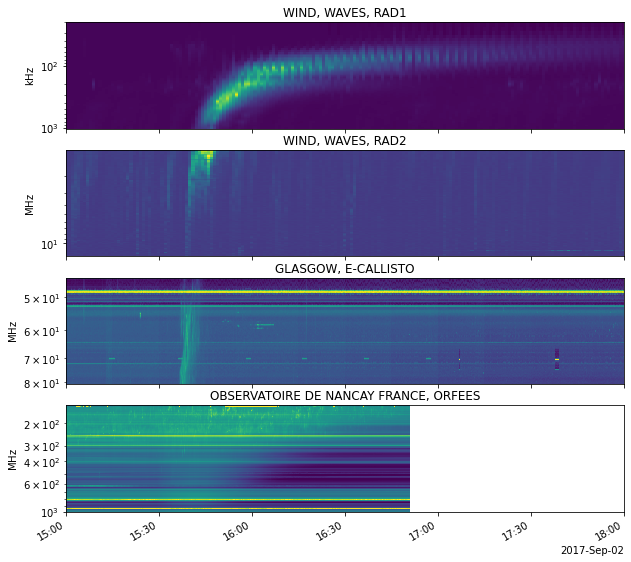

In [28]:
from datetime import datetime
from matplotlib.colors import LogNorm

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(10, 10))

waves_spec[0].plot(axes=axes[0])
waves_spec[1].plot(axes=axes[1])

[sp.plot(axes=axes[2]) for sp in callisto_specs]

vmm = np.percentile(orfee_spec_i.data, [1,99])
orfee_spec_i.plot(axes=axes[3], norm=LogNorm(vmin=vmm[0], vmax=vmm[1]))

# by default y-axis low to hight flip so moving away fro sun with time
[axes[i].set_ylim(reversed(axes[i].get_ylim())) for i in range(4)]

# log y-axis
[axes[i].set_yscale('log') for i in range(4)]


axes[1].set_xlim(datetime(2017, 9, 2, 15), datetime(2017, 9, 2, 18))